# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Robert Mason

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X,y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [4]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dtr = DecisionTreeRegressor(random_state=0, max_depth=5)
rfr = RandomForestRegressor(random_state=0, max_depth=5)
gbr = GradientBoostingRegressor(random_state=0, max_depth=5)

scores_dtr_mse = cross_validate(dtr, X_train, y_train, scoring='neg_mean_squared_error',return_train_score=True)
scores_rfr_mse = cross_validate(rfr, X_train, y_train, scoring='neg_mean_squared_error',return_train_score=True)
scores_gbr_mse = cross_validate(gbr, X_train, y_train, scoring='neg_mean_squared_error',return_train_score=True)

results_MSE = pd.DataFrame(index = ['DT','RF','GB'], columns=['Training Accuracy (MSE)', 'Validation Accuracy (MSE)'])

results_MSE.loc['DT'] = {'Training Accuracy (MSE)':scores_dtr_mse['train_score'].mean()*-1, 'Validation Accuracy (MSE)':scores_dtr_mse['test_score'].mean()*-1}
results_MSE.loc['RF'] = {'Training Accuracy (MSE)':scores_rfr_mse['train_score'].mean()*-1, 'Validation Accuracy (MSE)':scores_rfr_mse['test_score'].mean()*-1}
results_MSE.loc['GB'] = {'Training Accuracy (MSE)':scores_gbr_mse['train_score'].mean()*-1, 'Validation Accuracy (MSE)':scores_gbr_mse['test_score'].mean()*-1}

results_MSE

,Training Accuracy (MSE),Validation Accuracy (MSE)
DT,47.279761,73.447331
RF,29.577455,45.059351
GB,3.37944,22.783221


In [5]:
# TO DO: ADD YOUR CODE HERE
scores_dtr_R2 = cross_validate(dtr, X_train, y_train, scoring='r2',return_train_score=True)
scores_rfr_R2 = cross_validate(rfr, X_train, y_train, scoring='r2',return_train_score=True)
scores_gbr_R2 = cross_validate(gbr, X_train, y_train, scoring='r2',return_train_score=True)

results_R2 = pd.DataFrame(index = ['DT','RF','GB'], columns=['Training Accuracy (R2)', 'Validation Accuracy (R2)'])

results_R2.loc['DT'] = {'Training Accuracy (R2)':scores_dtr_R2['train_score'].mean(), 'Validation Accuracy (R2)':scores_dtr_R2['test_score'].mean()}
results_R2.loc['RF'] = {'Training Accuracy (R2)':scores_rfr_R2['train_score'].mean(), 'Validation Accuracy (R2)':scores_rfr_R2['test_score'].mean()}
results_R2.loc['GB'] = {'Training Accuracy (R2)':scores_gbr_R2['train_score'].mean(), 'Validation Accuracy (R2)':scores_gbr_R2['test_score'].mean()}

results_R2

,Training Accuracy (R2),Validation Accuracy (R2)
DT,0.834465,0.738697
RF,0.896557,0.840927
GB,0.988171,0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. The above models performed siginificantly better than the linear model from the previous assignment.  The current models produced R2 validation accuracies ranging from ~0.74 - 0.92 while the linear model from the previous assignment produced an R2 validation accuracy of ~0.62. 

2. I would choose the gradient boosting regressor since it resulted in the lowest mean squared error and the highest R2 value in both the training and validation cases as compared to the other 2 models. 

3. To increase the accuracy of the tree-based models you could try the following:

Pre-pruning the tree by limiting the maximum number of leaves or by requiring a minimum number of points in node to keep splitting.

Post-prunning the tree by removing or collapsing nodes that contain little information. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. My code was sourced primarily from in-class examples and the previous assignment. 
2. I completed the steps in the order laid out in the template. 
3. I did not use generative AI for this assignment. 
4. I initially did not know the answer to question 3 above, but looked back through the class notes for the information.  

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [6]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

print(f"X size={X.shape}; type={type(X)}")
print(f"y size={y.shape}; type={type(y)}")

X size=(178, 13); type=<class 'pandas.core.frame.DataFrame'>
y size=(178, 1); type=<class 'pandas.core.frame.DataFrame'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [7]:
# TO DO: ADD YOUR CODE HERE
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [9]:
# TO DO: ADD YOUR CODE HERE
print(X.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [10]:
print(y.isnull().sum())

class    0
dtype: int64


How many samples do we have of each type of wine?

In [11]:
# TO DO: ADD YOUR CODE HERE
y.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [12]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(random_state=0)
dct = DecisionTreeClassifier(random_state=0, max_depth=3)

scores_svc = cross_validate(svc, X_train, y_train.values.ravel(), scoring='accuracy',return_train_score=True)
scores_dct = cross_validate(dct, X_train, y_train, scoring='accuracy',return_train_score=True)

results= pd.DataFrame(index = ['SVC','DT'], columns=['Training Accuracy', 'Validation Accuracy'])

results.loc['SVC'] = {'Training Accuracy':scores_svc['train_score'].mean(), 'Validation Accuracy':scores_svc['test_score'].mean()}
results.loc['DT'] = {'Training Accuracy':scores_dct['train_score'].mean(), 'Validation Accuracy':scores_dct['test_score'].mean()}

results

,Training Accuracy,Validation Accuracy
SVC,0.680427,0.676638
DT,0.994357,0.894017


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [13]:
# TO DO: Implement best model
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Text(170.97222222222223, 0.5, 'true value')

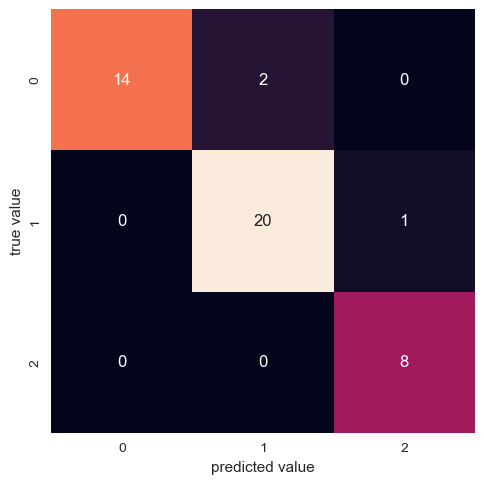

In [14]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(y_test, dct.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [15]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
y_pred = dct.predict(X_test)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      0.88      0.93        16
     class 2       0.91      0.95      0.93        21
     class 3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The training and validation accuracy of the SVC model were 0.68 and 0.67 respectively. These accuracies are relatively low which indicates that the SVC is underfitting the dataset.  The training and validation accuracy of the decision tree model were 0.99 and 0.89 respectively.  The very high training accuracy and reduced validation accuracy indicates that the tree based model is likely overfitting the dataset, however it did perform better than the SVC model. 
2. Two possible reasons why the support vector machines model did not work as well the tree-based model:

The SVC model may require tuning of the C and gamma parameters to determine the best model complexity for this dataset. 

The SVC model may require pre-processing of the data to improve the results, whereas the tree-based model generally does not. 

3. Three(3) samples were incorretly classified in step 5.2.

4. In this case, I wouldn't put an emphasis on maximizing precision over recall or vice-versa since the stakes of predicting any single class of wine correctly likely isn't any more important than another.  In this case, I would try to maximize the f-1 score to produce the best model.  



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code primarily from the in class examples and the previous assignment. 
2. I completed the steps in the order laid out in the template. 
3. I did not use any generative AI for this assignment. 
4. I had to refresh myself on the definitions of precision and recall.  I used the class notes and online information(searched through google) to find information on these terms. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

In part 1, the 2 ensemble tree models (random forest & gradient boosting) both outperformed the single tree model (Decision tree reg.) which is consistent with expectation and discussions during lectures. This is because ensemble tree models combine multiple ML models to create a more effective model. 

In part 2, the tree-based outperformed the SVC model but this is possibly due to a lack of model tuning and data pre-processing. 

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed testing different models and comparing the results.  By comparing the results of the different models against one another and explaning the potential reasons, I feel as though I have improved my understanding of the various models. 

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [33]:
# TO DO: ADD YOUR CODE HERE
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import LinearSVC

svc_linear = LinearSVC(random_state=0,max_iter=5000)
scores_svc_linear = cross_validate(svc_linear, X_train, y_train.values.ravel(), scoring='accuracy',return_train_score=True)
print("Training Accuracy:" + str(scores_svc_linear['train_score'].mean()))
print("Validation Accuracy:" + str(scores_svc_linear['test_score'].mean()))

/Users/robbie/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/robbie/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/robbie/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/robbie/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy:0.8682948333627227
Validation Accuracy:0.8498575498575498


/Users/robbie/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

LinearSVC did produce higher traning and validation accuracies than the SVC model, however the scores were still lower than the tree based model.  Additionally, the model failed to converge therefore it does not appear that LinearSVC is a good fit for this dataset. 